# 1. Fundamentos de *Machine Learning*

En este notebook se revisarán los conceptos de:

1. Notación
2. Vecinos más próximos
3. Repaso de Pandas
4. Evaluación del modelo: entrenamiento y test
5. Selección del modelo: validación cruzada
6. Conceptos fundamentales de ML
  1. Compromiso sesgo-varianza
  2. Curvas de aprendizaje

Primero cargamos librerías y funciones necesarias, incluyendo las del módulo `utils`:

# 1. Fundamentos de *Machine Learning*

En este notebook se revisarán los conceptos de:

1. Primera que nada separar los notebooks en training y test
    1.1 Valorar si existen variables categoricas, si vale la pena tratarlas antes o despues del split
2. Analisis exploratorio
    2.1 Utilizar la libreria aprendida
    2.2 Tratar valores nullos
    2.3 Tratar los outliers
    2.4 Matriz de correlacion
3. Preprocesamiento
    3.1 Eliminar variables correlacionadas (buscar script visto)
    3.2 Transformar al formato que queramos las columnas
    3.3 Creación de nuevas variables
    3.4 Tratar nulos, outliers, etc
4. Modelado
    4.1 Cross validation
    Evaluacion de los modelos
5. Conclusión

In [1]:
import numpy  as np  
import pandas as pd

from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [265]:
# Importamos el dataset y filtramos solamente por los apartamentos que son de Madrid
data = pd.read_csv(r'C:\Users\CARLES\Downloads\airbnb-listings-extract.csv', delimiter=';')
data = data[data['City'] == 'Madrid']
print(data.shape)
data.head(5).T    

(13207, 89)


,40,41,42,43,44
ID,6478626,4941335,12510355,4756811,15332216
Listing Url,https://www.airbnb.com/rooms/6478626,https://www.airbnb.com/rooms/4941335,https://www.airbnb.com/rooms/12510355,https://www.airbnb.com/rooms/4756811,https://www.airbnb.com/rooms/15332216
Scrape ID,20170407214119,20170407214119,20170407214119,20170407214119,20170407214119
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,Habitación con baño .,Cómodo estudio en la calle Goya,Studio & Terrace - Barrio Salamanca,Cute single room -private bathroom,Deluxe Apartment in Barrio Salamanca (next to IE)
...,...,...,...,...,...
Cancellation Policy,flexible,moderate,flexible,strict,moderate
Calculated host listings count,3.0,1.0,1.0,7.0,2.0
Reviews per Month,7.71,2.03,3.28,0.57,NaN
Geolocation,"40.4069528479,-3.6708944906","40.4259039216,-3.6816474596","40.4283518893,-3.68715466311","40.4274544347,-3.68576302323","40.4286708577,-3.68542275712"


In [266]:
# Primero que nada, dividimos el dataset entre training y test

train, test = train_test_split(data, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv(r'C:\Users\CARLES\Downloads\airbnb_train.csv', sep=';', decimal='.', index=False)
test.to_csv(r'C:\Users\CARLES\Downloads\airbnb_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 
airbnb_data = pd.read_csv(r'C:\Users\CARLES\Downloads\airbnb_train.csv', sep=';', decimal='.')
airbnb_data.head(5).T
airbnb_data.dtypes

Dimensiones del dataset de training: (10565, 89)
Dimensiones del dataset de test: (2642, 89)


C:\Users\CARLES\AppData\Local\Temp\ipykernel_18248\4237644567.py:14: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_data = pd.read_csv(r'C:\Users\CARLES\Downloads\airbnb_train.csv', sep=';', decimal='.')


ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object

In [267]:
# Ejecutamos ProfileReport para realizar el EDA
profile = ProfileReport(airbnb_data, title="airbnb train data")

# Como es muy pesado, lo guardamos en un archivo HTML
profile.to_file(r'C:\Users\CARLES\Downloads\airbnb_train_madrid.html')

Analizando el reporte generado, vamos a eliminar variables categoricas que no nos aportan informacion, bien porque la mayoria de los datos estan vacios o bien porque las muestras estan muy desbalanceadas

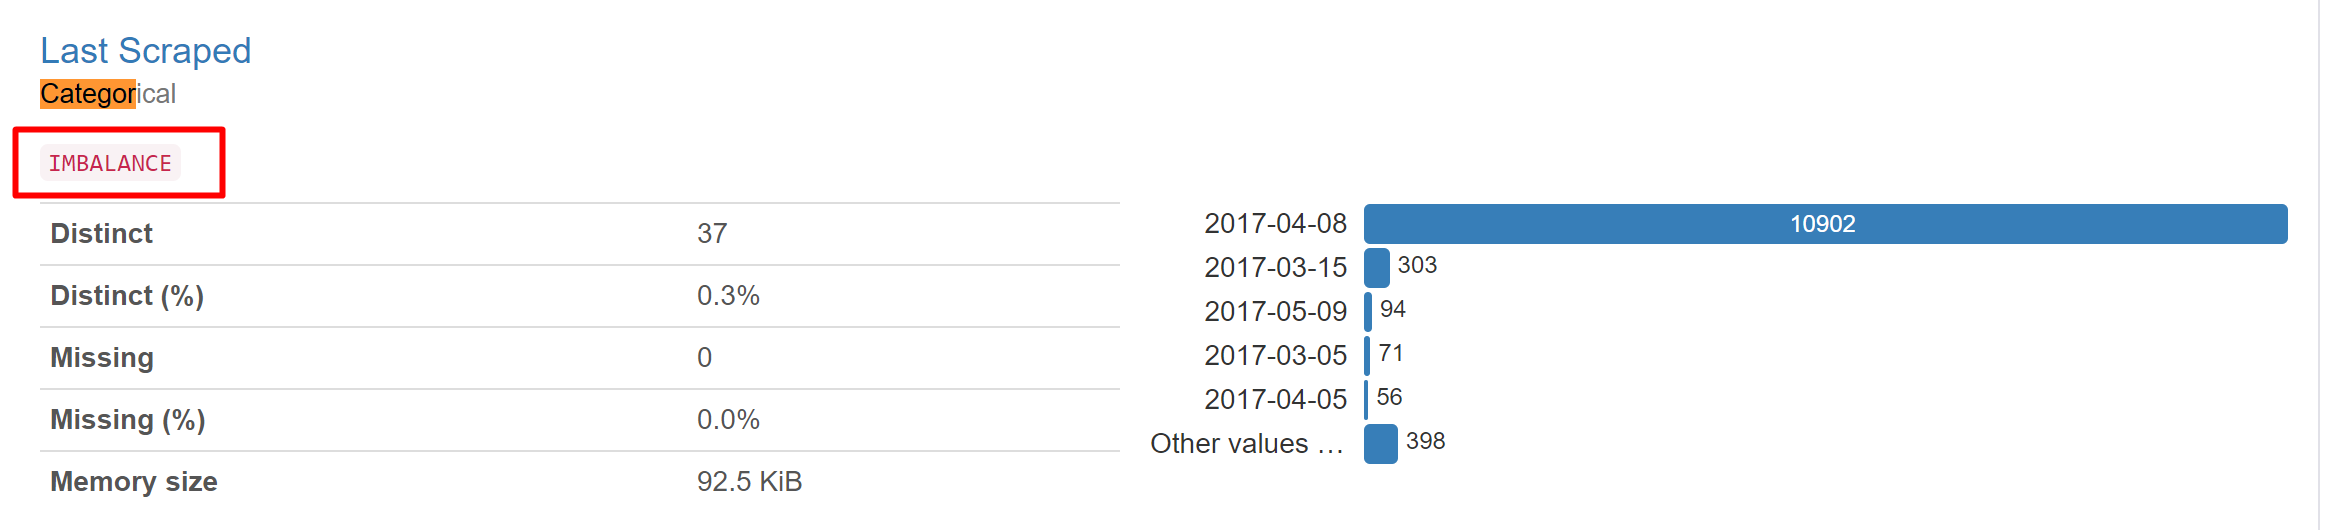

In [268]:
# Eliminamos las variables categoricas consideradas
categorical_var_to_drop = \
    ['Last Scraped', 
    'Experiences Offered',
    'Host Response Time',
    'Host Acceptance Rate',
    'Market',
    'City',
    'Smart Location',
    'State',
    'Country Code',
    'Country',
    'Property Type',
    'Bed Type',
    'Calendar last Scraped',
    'Jurisdiction Names']
airbnb_data = airbnb_data.drop(categorical_var_to_drop, axis = 1)
airbnb_data.shape

(10565, 75)

A continuacion vamos a eliminar las variables que son texto y que tampoco nos aportan

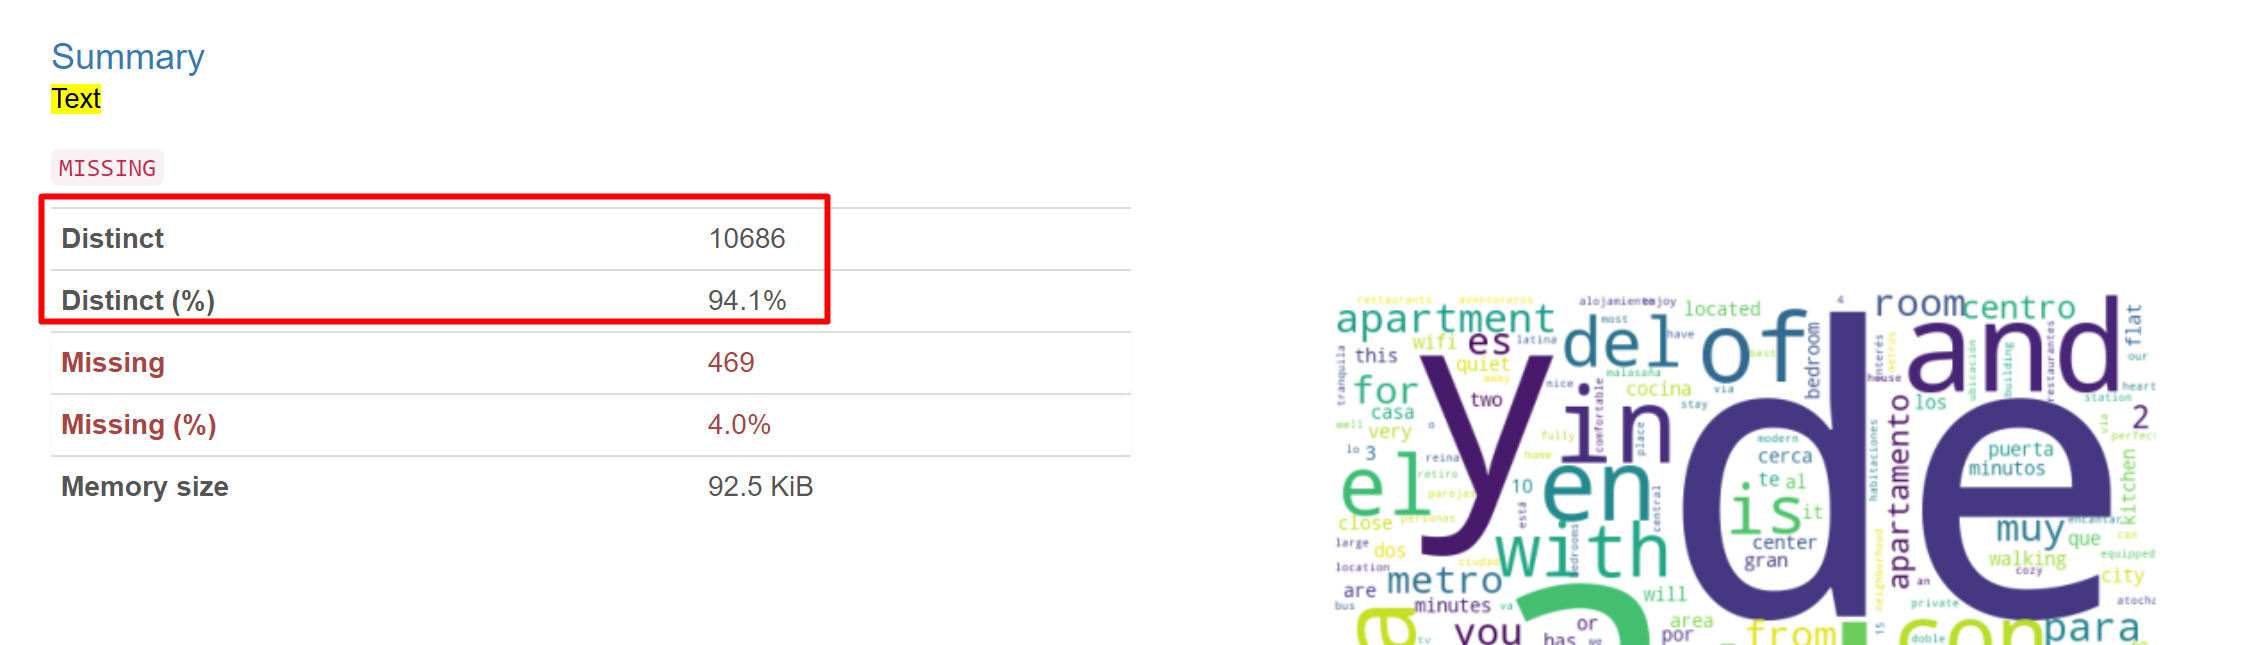

In [269]:
variables_texto = airbnb_data.select_dtypes(include=['object'])

# Listar las variables de tipo texto
print(variables_texto.columns.tolist())

['Listing Url', 'Name', 'Summary', 'Space', 'Description', 'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url', 'Host URL', 'Host Name', 'Host Since', 'Host Location', 'Host About', 'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Host Verifications', 'Street', 'Neighbourhood', 'Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Zipcode', 'Room Type', 'Amenities', 'Calendar Updated', 'First Review', 'Last Review', 'License', 'Cancellation Policy', 'Geolocation', 'Features']


In [270]:
# Eliminamos las variables de texto consideradas
text_var_to_drop = \
    ['Listing Url', 
    'Name',
    'Summary',
    'Space',
    'Description',
    'Neighborhood Overview',
    'Notes',
    'Transit',
    'Access',
    'Interaction',
    'House Rules',
    'Thumbnail Url',
    'Medium Url',
    'Picture Url',
    'XL Picture Url',
    'Host URL',
    'Host Name', 
    'Host Since', 
    'Host Location', 
    'Host About', 
    'Host Thumbnail Url', 
    'Host Picture Url', 
    'Host Neighbourhood', 
    'Host Verifications', 
    'Street', 
    'Neighbourhood', 
    'Zipcode', 
    'Amenities', 
    'Calendar Updated', 
    'Has Availability', 
    'First Review', 
    'Last Review', 
    'License', 
    'Geolocation', 
    'Features'
    ]
airbnb_data = airbnb_data.drop(text_var_to_drop, axis = 1)
airbnb_data.shape

(10565, 40)

In [271]:
# Eliminamos las variables numericas consideradas.
# Bien porque faltan registros, las muestras estan desbalanceadas o creemos que no aportan valor como el ID

numeric_var_to_drop = \
    ['ID',
     'Scrape ID',
     'Host ID',
     'Host Response Rate',
     'Host Listings Count',
     'Host Total Listings Count',
     'Latitude',
     'Longitude',
     'Monthly Price',
     'Weekly Price',
     'Square Feet',
     'Security Deposit',
     'Cleaning Fee',
     'Maximum Nights',
     'Review Scores Accuracy',
     'Review Scores Cleanliness',
     'Review Scores Checkin',
     'Review Scores Communication',
     'Review Scores Location',
     'Review Scores Value',
     'Reviews per Month'
     ]
    
airbnb_data = airbnb_data.drop(numeric_var_to_drop, axis = 1)
airbnb_data.shape

(10565, 19)

In [272]:
# Vemos los formatos de las variables que tenemos ahora mismo
airbnb_data.dtypes

Neighbourhood Cleansed             object
Neighbourhood Group Cleansed       object
Room Type                          object
Accommodates                        int64
Bathrooms                         float64
Bedrooms                          float64
Beds                              float64
Price                             float64
Guests Included                     int64
Extra People                        int64
Minimum Nights                      int64
Availability 30                     int64
Availability 60                     int64
Availability 90                     int64
Availability 365                    int64
Number of Reviews                   int64
Review Scores Rating              float64
Cancellation Policy                object
Calculated host listings count    float64
dtype: object

In [301]:
# Vamos a modificar el uso de la variable 'Neighbourhood Group Cleansed'. Casi la mitad de las muestras estan en el centro,
# asi que haremos que esta variable diga si el apartamento esta en el centro o no

# Reemplazamos centro por 1
airbnb_data['Neighbourhood Group Cleansed'] = airbnb_data['Neighbourhood Group Cleansed'].replace({'Centro': 1})

# El resto de valores los reemplazamos por 0
airbnb_data.loc[airbnb_data['Neighbourhood Group Cleansed'] != 1, 'Neighbourhood Group Cleansed'] = 0

# Mostramos el DataFrame con los cambios aplicados
airbnb_data['Neighbourhood Group Cleansed'] = airbnb_data['Neighbourhood Group Cleansed'].astype(int).astype(bool)
airbnb_data['Neighbourhood Group Cleansed'].dtypes

C:\Users\CARLES\AppData\Local\Temp\ipykernel_18248\1247681844.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  airbnb_data.loc[airbnb_data['Neighbourhood Group Cleansed'] != 1, 'Neighbourhood Group Cleansed'] = 0


dtype('bool')

In [274]:
# Al haber pocos registros con los valores super_strict los vamos a considerar como si tambien fuesen strict.
airbnb_data['Cancellation Policy'] = airbnb_data['Cancellation Policy'].replace({'super_strict_30':'strict', 'super_strict_60':'strict'})
unicos = airbnb_data['Cancellation Policy'].unique()
unicos

array(['flexible', 'moderate', 'strict'], dtype=object)

In [276]:
# Convertimos la variable Neighbourhood Cleansed categorica
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

categorical_col = ['Neighbourhood Cleansed', 'Cancellation Policy', 'Room Type']

# Codificar cada columna
for col in categorical_col:
    old_col = airbnb_data[col]
    new_col = label_encoder.fit_transform(old_col)
    mapeo_valores = dict(zip(old_col, new_col))
    airbnb_data[col] = airbnb_data[col].map(mapeo_valores)
    print(f'Mapeo de valores para {col}: {mapeo_valores}')

print(mapeo_valores)
#airbnb_data.T

Mapeo de valores para Neighbourhood Cleansed: {'Embajadores': 48, 'Ventas': 121, 'Cortes': 39, 'Sol': 111, 'Pacífico': 79, 'Palos de Moguer': 84, 'Trafalgar': 113, 'Berruguete': 19, 'Jerónimos': 61, 'Palacio': 80, 'Universidad': 114, 'Recoletos': 97, 'Justicia': 62, 'Gaztambide': 54, 'Pradolongo': 91, 'Costillares': 40, 'Niño Jesús': 73, 'Quintana': 96, 'Ciudad Jardín': 33, 'Castellana': 29, 'Puerta del Angel': 95, 'Concepción': 37, 'Pinar del Rey': 88, 'Guindalera': 56, 'Lista': 65, 'San Juan Bautista': 107, 'Argüelles': 16, 'San Isidro': 106, 'Acacias': 1, 'Rios Rosas': 99, 'Cuatro Caminos': 41, 'Casa de Campo': 25, 'Goya': 55, 'Delicias': 44, 'Aeropuerto': 3, 'Almagro': 6, 'Aluche': 9, 'Los Rosales': 67, 'Arapiles': 13, 'Chopera': 32, 'Legazpi': 64, 'San Pascual': 108, 'Valverde': 120, 'Valdeacederas': 115, 'Valdefuentes': 116, 'Vinateros': 122, 'Simancas': 110, 'Moscardó': 72, 'Lucero': 68, 'Casco Histórico de Vicálvaro': 28, 'Vallehermoso': 119, 'Castilla': 30, 'Castillejos': 31, 

A continuacion vamos a analizar las correlaciones que hay entre las variables que nos quedan

In [279]:
# Calcula la matriz de correlación
corr = airbnb_data.corr()

# Aplica el estilo con el gradiente de color
corr_styled = corr.style.background_gradient(cmap='coolwarm')
corr_styled

,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count
Neighbourhood Cleansed,1.000000,0.220959,-0.054385,0.052833,0.027090,0.018642,0.024704,0.054013,0.043984,0.022505,-0.008991,-0.014015,-0.015725,-0.018566,0.000088,0.044637,0.006326,0.055722,0.021799
Neighbourhood Group Cleansed,0.220959,1.000000,-0.222101,0.129061,0.010453,-0.055010,0.021306,0.119173,0.125047,0.082955,-0.003218,-0.185429,-0.168574,-0.154714,-0.012960,0.221960,0.009858,0.184733,0.095253
Room Type,-0.054385,-0.222101,1.000000,-0.491908,0.031875,-0.242041,-0.268961,-0.449014,-0.359760,-0.107725,-0.028344,0.257286,0.232261,0.222474,0.021118,-0.143482,0.008738,-0.205352,-0.086377
Accommodates,0.052833,0.129061,-0.491908,1.000000,0.317911,0.675677,0.822312,0.575062,0.577543,0.264841,0.002555,-0.067163,-0.058821,-0.064222,0.077336,0.086196,-0.066422,0.219014,0.124925
Bathrooms,0.027090,0.010453,0.031875,0.317911,1.000000,0.419796,0.380313,0.345112,0.179387,0.081145,0.024179,-0.018280,-0.034847,-0.035590,-0.001305,-0.060366,0.012926,0.116504,0.179666
Bedrooms,0.018642,-0.055010,-0.242041,0.675677,0.419796,1.000000,0.692318,0.519582,0.429051,0.140819,0.014164,-0.025169,-0.036948,-0.047138,0.021943,-0.020984,0.012664,0.078680,0.064178
Beds,0.024704,0.021306,-0.268961,0.822312,0.380313,0.692318,1.000000,0.489003,0.456033,0.202553,-0.000781,-0.001306,-0.003130,-0.012166,0.090722,0.039015,-0.055416,0.142766,0.091414
Price,0.054013,0.119173,-0.449014,0.575062,0.345112,0.519582,0.489003,1.000000,0.363070,0.105152,0.029915,0.017397,0.003773,-0.013113,0.071092,-0.030685,0.057216,0.131260,0.151365
Guests Included,0.043984,0.125047,-0.359760,0.577543,0.179387,0.429051,0.456033,0.363070,1.000000,0.335939,-0.000400,-0.089187,-0.075784,-0.075845,0.053996,0.121515,0.006740,0.192304,0.049395
Extra People,0.022505,0.082955,-0.107725,0.264841,0.081145,0.140819,0.202553,0.105152,0.335939,1.000000,-0.016275,0.033245,0.044688,0.043612,0.089296,0.073336,0.019391,0.145489,0.015459


In [280]:
# Vamos a eliminar las variables que tienen mas de un 85% de correlacion
threshold = 0.85

vars_to_drop = set()

# Iteramos sobre la matriz de correlación
for i in range(len(corr.columns)):
    for j in range(i):
        if corr.iloc[i, j] > threshold:
            colname_i = corr.columns[i]
            colname_j = corr.columns[j]
            # Si colname_j no está en vars_to_drop, añadimos colname_i a vars_to_drop
            if colname_j not in vars_to_drop:
                vars_to_drop.add(colname_i)

vars_to_drop

{'Availability 60', 'Availability 90'}

In [281]:
# Comprobamos con shape las columnas que tenemos ahora
airbnb_data_reduced = airbnb_data.drop(columns=vars_to_drop)
airbnb_data_reduced.shape

(10565, 17)

In [282]:
# Volvemos a ver la matriz de correlacion para comprobar
corr_reduced = airbnb_data_reduced.corr()

corr_reduced = corr_reduced.style.background_gradient(cmap='coolwarm')
corr_reduced

,Neighbourhood Cleansed,Neighbourhood Group Cleansed,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Availability 30,Availability 365,Number of Reviews,Review Scores Rating,Cancellation Policy,Calculated host listings count
Neighbourhood Cleansed,1.000000,0.220959,-0.054385,0.052833,0.027090,0.018642,0.024704,0.054013,0.043984,0.022505,-0.008991,-0.014015,0.000088,0.044637,0.006326,0.055722,0.021799
Neighbourhood Group Cleansed,0.220959,1.000000,-0.222101,0.129061,0.010453,-0.055010,0.021306,0.119173,0.125047,0.082955,-0.003218,-0.185429,-0.012960,0.221960,0.009858,0.184733,0.095253
Room Type,-0.054385,-0.222101,1.000000,-0.491908,0.031875,-0.242041,-0.268961,-0.449014,-0.359760,-0.107725,-0.028344,0.257286,0.021118,-0.143482,0.008738,-0.205352,-0.086377
Accommodates,0.052833,0.129061,-0.491908,1.000000,0.317911,0.675677,0.822312,0.575062,0.577543,0.264841,0.002555,-0.067163,0.077336,0.086196,-0.066422,0.219014,0.124925
Bathrooms,0.027090,0.010453,0.031875,0.317911,1.000000,0.419796,0.380313,0.345112,0.179387,0.081145,0.024179,-0.018280,-0.001305,-0.060366,0.012926,0.116504,0.179666
Bedrooms,0.018642,-0.055010,-0.242041,0.675677,0.419796,1.000000,0.692318,0.519582,0.429051,0.140819,0.014164,-0.025169,0.021943,-0.020984,0.012664,0.078680,0.064178
Beds,0.024704,0.021306,-0.268961,0.822312,0.380313,0.692318,1.000000,0.489003,0.456033,0.202553,-0.000781,-0.001306,0.090722,0.039015,-0.055416,0.142766,0.091414
Price,0.054013,0.119173,-0.449014,0.575062,0.345112,0.519582,0.489003,1.000000,0.363070,0.105152,0.029915,0.017397,0.071092,-0.030685,0.057216,0.131260,0.151365
Guests Included,0.043984,0.125047,-0.359760,0.577543,0.179387,0.429051,0.456033,0.363070,1.000000,0.335939,-0.000400,-0.089187,0.053996,0.121515,0.006740,0.192304,0.049395
Extra People,0.022505,0.082955,-0.107725,0.264841,0.081145,0.140819,0.202553,0.105152,0.335939,1.000000,-0.016275,0.033245,0.089296,0.073336,0.019391,0.145489,0.015459


In [283]:
# Analizamos tanto el tipo de variable (por si faltase convertir alguna, aunque se haya hecho previamente)
# y vemos los nulos existentes en cada variable

airbnb_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10565 entries, 0 to 10564
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighbourhood Cleansed          10565 non-null  int32  
 1   Neighbourhood Group Cleansed    10565 non-null  bool   
 2   Room Type                       10565 non-null  int32  
 3   Accommodates                    10565 non-null  int64  
 4   Bathrooms                       10523 non-null  float64
 5   Bedrooms                        10545 non-null  float64
 6   Beds                            10522 non-null  float64
 7   Price                           10558 non-null  float64
 8   Guests Included                 10565 non-null  int64  
 9   Extra People                    10565 non-null  int64  
 10  Minimum Nights                  10565 non-null  int64  
 11  Availability 30                 10565 non-null  int64  
 12  Availability 365                

En las variables ['Beds', 'Bathrooms', 'Bedrooms', 'Price'] hay muy pocos registros nulos, por lo que filtraremos esas filas y las eliminaremos directamente


In [284]:
# Lista de columnas que queremos verificar
columns_to_check = ['Beds', 'Bathrooms', 'Bedrooms', 'Price']

# Contar los valores nulos en cada columna
#for i in columns_to_check:
airbnb_data_reduced = airbnb_data_reduced.dropna(subset=columns_to_check)

#null_counts = airbnb_data_reduced.dropna(subset=columns_to_check)
airbnb_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10487 entries, 0 to 10564
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighbourhood Cleansed          10487 non-null  int32  
 1   Neighbourhood Group Cleansed    10487 non-null  bool   
 2   Room Type                       10487 non-null  int32  
 3   Accommodates                    10487 non-null  int64  
 4   Bathrooms                       10487 non-null  float64
 5   Bedrooms                        10487 non-null  float64
 6   Beds                            10487 non-null  float64
 7   Price                           10487 non-null  float64
 8   Guests Included                 10487 non-null  int64  
 9   Extra People                    10487 non-null  int64  
 10  Minimum Nights                  10487 non-null  int64  
 11  Availability 30                 10487 non-null  int64  
 12  Availability 365                10487

En la variable Review Scores Rating hemos detectado que son NaN aquellos valores que no tienen ninguna review. Por lo tanto, les asignamos un 0 tambien.

In [285]:
airbnb_data_reduced['Review Scores Rating'] = airbnb_data_reduced['Review Scores Rating'].fillna(0)
airbnb_data_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10487 entries, 0 to 10564
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Neighbourhood Cleansed          10487 non-null  int32  
 1   Neighbourhood Group Cleansed    10487 non-null  bool   
 2   Room Type                       10487 non-null  int32  
 3   Accommodates                    10487 non-null  int64  
 4   Bathrooms                       10487 non-null  float64
 5   Bedrooms                        10487 non-null  float64
 6   Beds                            10487 non-null  float64
 7   Price                           10487 non-null  float64
 8   Guests Included                 10487 non-null  int64  
 9   Extra People                    10487 non-null  int64  
 10  Minimum Nights                  10487 non-null  int64  
 11  Availability 30                 10487 non-null  int64  
 12  Availability 365                10487

A traves de bloxplots vamos a analizar los outliers de cada variable

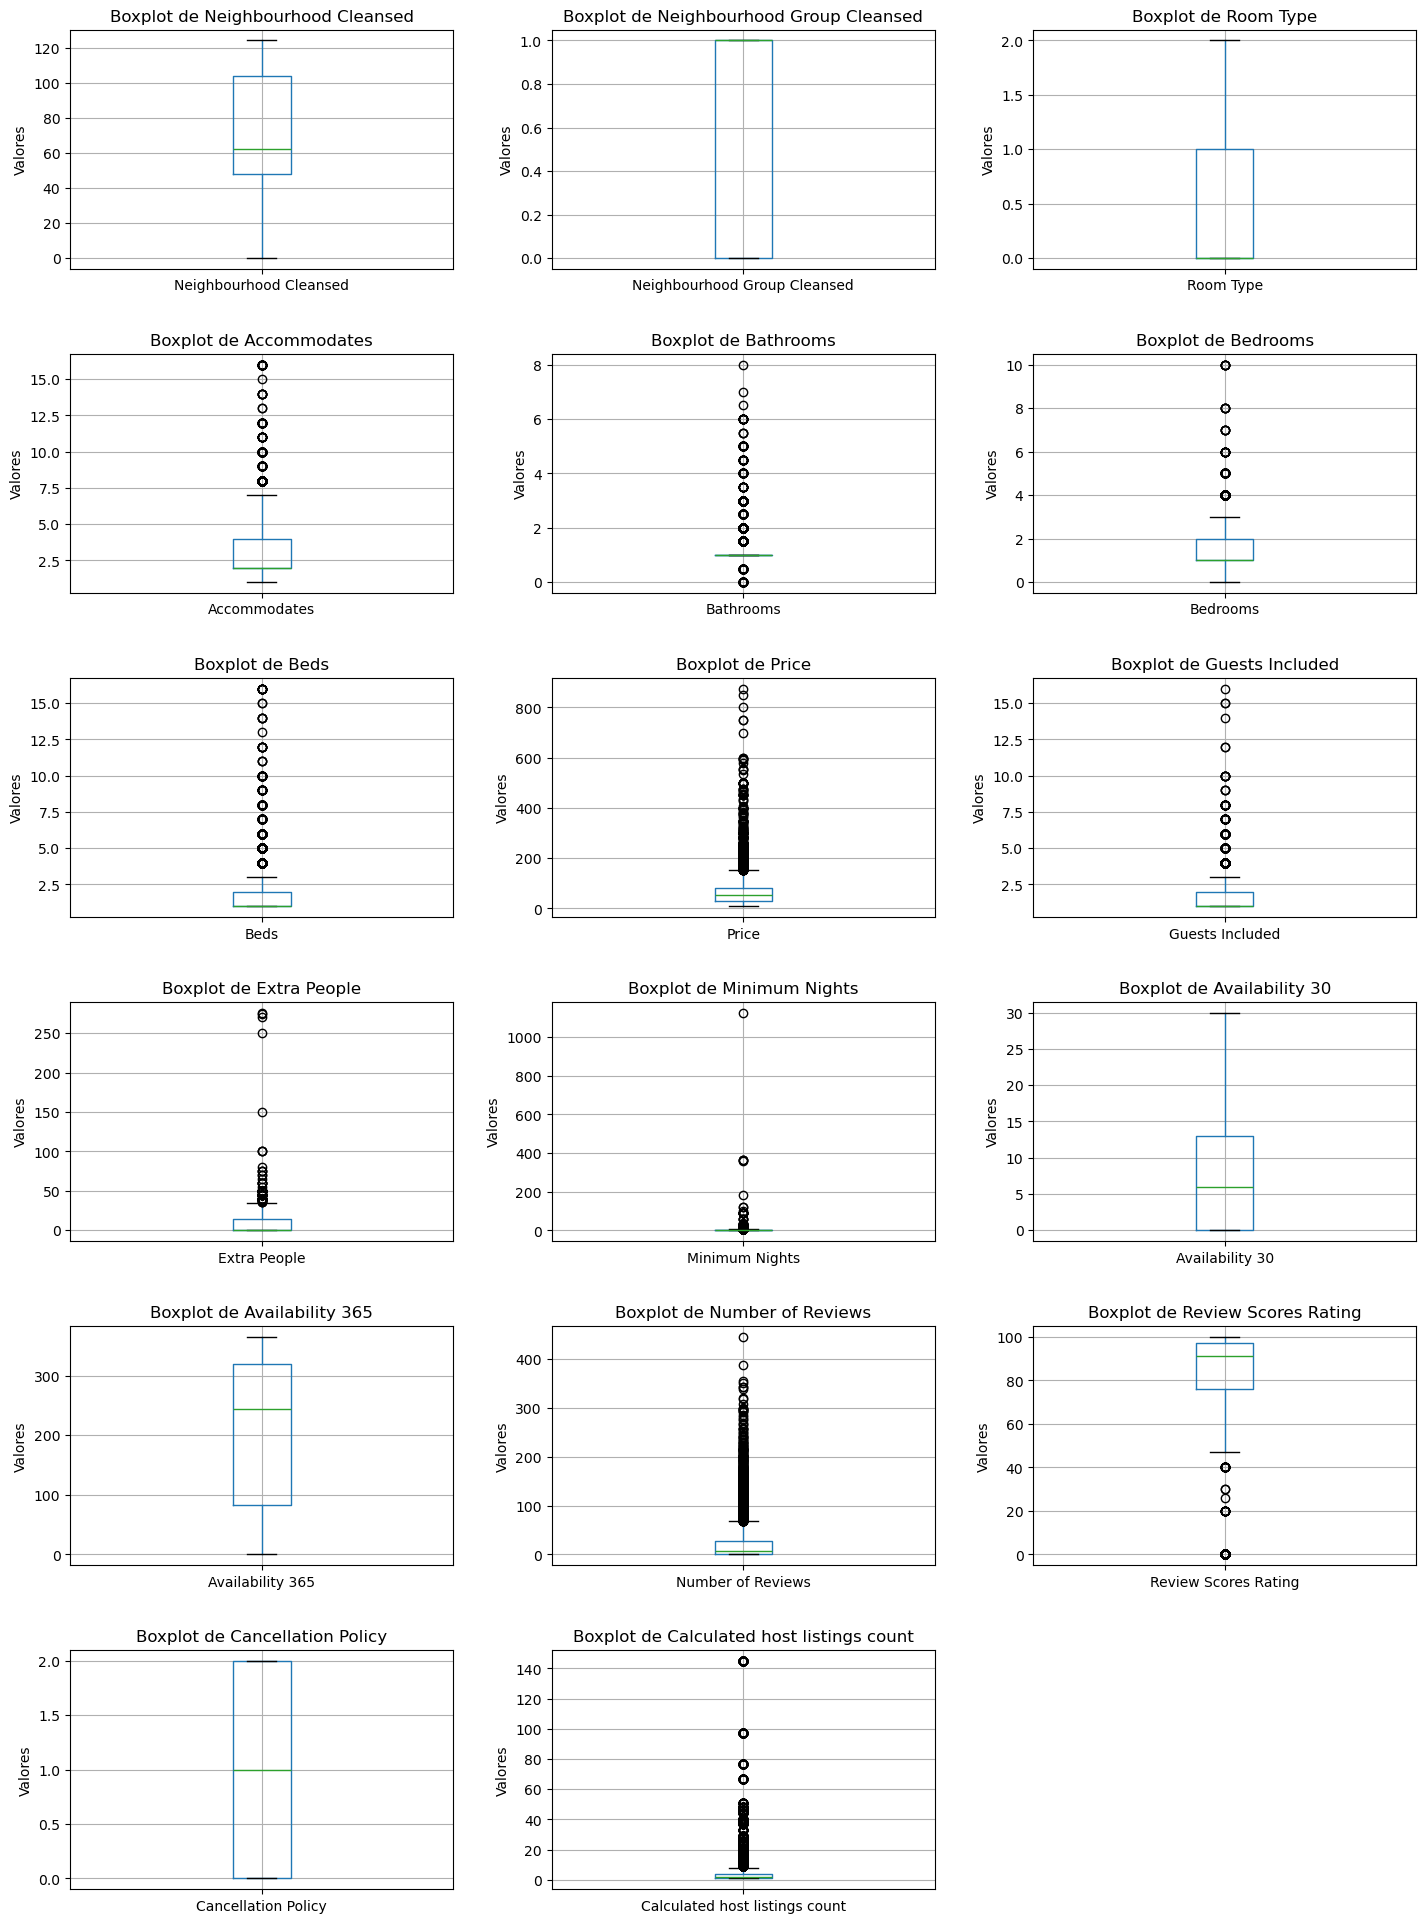

In [290]:
import pandas as pd
import matplotlib.pyplot as plt

# Número de columnas por fila
cols = 3

# Número de filas necesario
rows = (len(airbnb_data_reduced.columns) + cols - 1) // cols

# Crear los subplots
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 20))

# Ajustar espacio entre subplots
fig.tight_layout(pad=4.0)

# Iterar sobre las columnas y los ejes
for i, column in enumerate(airbnb_data_reduced.columns):
    ax = axes[i // cols, i % cols]
    airbnb_data_reduced.boxplot(column=column, ax=ax)
    ax.set_title(f'Boxplot de {column}')
    ax.set_ylabel('Valores')

# Eliminar los subplots vacíos
for j in range(i + 1, rows * cols):
    fig.delaxes(axes[j // cols, j % cols])

plt.show()


In [297]:
# Eliminamos los outliers que consideramos, siendo conservadores para no eliminar muchos registros

airbnb_data_reduced_no_outliers = airbnb_data_reduced[airbnb_data_reduced['Minimum Nights'] <= 400]
airbnb_data_reduced_no_outliers = airbnb_data_reduced[airbnb_data_reduced['Extra People'] <= 150]
airbnb_data_reduced_no_outliers = airbnb_data_reduced[airbnb_data_reduced['Calculated host listings count'] <= 100]

In [298]:
# Vemos el % de filas eliminadas del total
print(
    f'Original: {airbnb_data_reduced.shape[0]} // '
    f'Modificado: {airbnb_data_reduced_no_outliers.shape[0]}\nDiferencia: {airbnb_data_reduced.shape[0] - airbnb_data_reduced_no_outliers.shape[0]}'
)
print(f'Variación: {(((airbnb_data_reduced.shape[0] - airbnb_data_reduced_no_outliers.shape[0])/airbnb_data_reduced.shape[0])*100):.2f}%')

Original: 10487 // Modificado: 10388
Diferencia: 99
Variación: 0.94%


# Una vez finalizada la preparacion de los datos, vamos a hacerlo todo a la vez y a hacerlo tambien con el dataset de TEST

In [2]:
# Importamos el fichero de train
airbnb_data = pd.read_csv(r'C:\Users\CARLES\Downloads\airbnb_train.csv', sep=';', decimal='.')

#Eliminamos variables categoricas que no nos aportan
categorical_var_to_drop = ['Last Scraped', 'Experiences Offered','Host Response Time','Host Acceptance Rate','Market','City','Smart Location','State','Country Code','Country','Property Type','Bed Type','Calendar last Scraped','Jurisdiction Names']
airbnb_data = airbnb_data.drop(categorical_var_to_drop, axis = 1)

#Eliminamos variables de texto que no nos aportan
text_var_to_drop = ['Listing Url', 'Name','Summary','Space','Description','Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url',\
    'Host URL','Host Name', 'Host Since', 'Host Location','Host About','Host Thumbnail Url','Host Picture Url','Host Neighbourhood','Host Verifications','Street','Neighbourhood','Zipcode','Amenities','Calendar Updated', \
    'Has Availability', 'First Review','Last Review', 'License','Geolocation','Features']
airbnb_data = airbnb_data.drop(text_var_to_drop, axis = 1)

#Eliminamos variables numericas que no nos aportan
numeric_var_to_drop = ['ID','Scrape ID','Host ID','Host Response Rate','Host Listings Count','Host Total Listings Count','Latitude','Longitude','Monthly Price','Weekly Price','Square Feet','Security Deposit',\
     'Cleaning Fee','Maximum Nights','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value','Reviews per Month',\
    'Availability 60', 'Availability 90']
airbnb_data = airbnb_data.drop(numeric_var_to_drop, axis = 1)

# Tratamos la variable Neighbourhood Group Cleansed para que sea un bool de si un apartamento esta en el centro o no. Luego lo convertimos a tipo bool.
airbnb_data['Neighbourhood Group Cleansed'] = airbnb_data['Neighbourhood Group Cleansed'].replace({'Centro': 1})
airbnb_data.loc[airbnb_data['Neighbourhood Group Cleansed'] != 1, 'Neighbourhood Group Cleansed'] = 0
airbnb_data['Neighbourhood Group Cleansed'] = airbnb_data['Neighbourhood Group Cleansed'].astype(int).astype(bool)

# Al haber pocos registros con los valores super_strict los vamos a considerar como si tambien fuesen strict.
airbnb_data['Cancellation Policy'] = airbnb_data['Cancellation Policy'].replace({'super_strict_30':'strict', 'super_strict_60':'strict'})

# Vamos a tratar las variables categoricas
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
categorical_col = ['Neighbourhood Cleansed', 'Cancellation Policy', 'Room Type']
for col in categorical_col:
    old_col = airbnb_data[col]
    new_col = label_encoder.fit_transform(old_col)
    mapeo_valores = dict(zip(old_col, new_col))
    airbnb_data[col] = airbnb_data[col].map(mapeo_valores)
    print(f'Mapeo de valores para {col}: {mapeo_valores}')

# Vamos a eliminar algunos pocos registros que estan vacios en estas variables
columns_to_check = ['Beds', 'Bathrooms', 'Bedrooms', 'Price']
airbnb_data = airbnb_data.dropna(subset=columns_to_check)

# Rellenamos con 0 Review Scores Rating ya que son aquellos registros donde el numero de reviews es 0, por lo que tiene sentigo que tampoco haya rating
airbnb_data['Review Scores Rating'] = airbnb_data['Review Scores Rating'].fillna(0)

# Despues de analizar, quitamos los outliers que vemos oportunos
airbnb_data = airbnb_data[airbnb_data['Minimum Nights'] <= 400]
airbnb_data = airbnb_data[airbnb_data['Extra People'] <= 150]
airbnb_data = airbnb_data[airbnb_data['Calculated host listings count'] <= 100]

C:\Users\CARLES\AppData\Local\Temp\ipykernel_20796\2247541826.py:2: DtypeWarning: Columns (40) have mixed types. Specify dtype option on import or set low_memory=False.
  airbnb_data = pd.read_csv(r'C:\Users\CARLES\Downloads\airbnb_train.csv', sep=';', decimal='.')


Mapeo de valores para Neighbourhood Cleansed: {'Embajadores': 48, 'Ventas': 121, 'Cortes': 39, 'Sol': 111, 'Pacífico': 79, 'Palos de Moguer': 84, 'Trafalgar': 113, 'Berruguete': 19, 'Jerónimos': 61, 'Palacio': 80, 'Universidad': 114, 'Recoletos': 97, 'Justicia': 62, 'Gaztambide': 54, 'Pradolongo': 91, 'Costillares': 40, 'Niño Jesús': 73, 'Quintana': 96, 'Ciudad Jardín': 33, 'Castellana': 29, 'Puerta del Angel': 95, 'Concepción': 37, 'Pinar del Rey': 88, 'Guindalera': 56, 'Lista': 65, 'San Juan Bautista': 107, 'Argüelles': 16, 'San Isidro': 106, 'Acacias': 1, 'Rios Rosas': 99, 'Cuatro Caminos': 41, 'Casa de Campo': 25, 'Goya': 55, 'Delicias': 44, 'Aeropuerto': 3, 'Almagro': 6, 'Aluche': 9, 'Los Rosales': 67, 'Arapiles': 13, 'Chopera': 32, 'Legazpi': 64, 'San Pascual': 108, 'Valverde': 120, 'Valdeacederas': 115, 'Valdefuentes': 116, 'Vinateros': 122, 'Simancas': 110, 'Moscardó': 72, 'Lucero': 68, 'Casco Histórico de Vicálvaro': 28, 'Vallehermoso': 119, 'Castilla': 30, 'Castillejos': 31, 

In [3]:
# Hacemos lo mismo para el fichero de test
airbnb_data_test = pd.read_csv(r'C:\Users\CARLES\Downloads\airbnb_test.csv', sep=';', decimal='.')

#Eliminamos variables categoricas que no nos aportan
categorical_var_to_drop = ['Last Scraped', 'Experiences Offered','Host Response Time','Host Acceptance Rate','Market','City','Smart Location','State','Country Code','Country','Property Type','Bed Type','Calendar last Scraped','Jurisdiction Names']
airbnb_data_test = airbnb_data_test.drop(categorical_var_to_drop, axis = 1)

#Eliminamos variables de texto que no nos aportan
text_var_to_drop = ['Listing Url', 'Name','Summary','Space','Description','Neighborhood Overview','Notes','Transit','Access','Interaction','House Rules','Thumbnail Url','Medium Url','Picture Url','XL Picture Url',\
    'Host URL','Host Name', 'Host Since', 'Host Location','Host About','Host Thumbnail Url','Host Picture Url','Host Neighbourhood','Host Verifications','Street','Neighbourhood','Zipcode','Amenities','Calendar Updated', \
    'Has Availability', 'First Review','Last Review', 'License','Geolocation','Features']
airbnb_data_test = airbnb_data_test.drop(text_var_to_drop, axis = 1)

#Eliminamos variables numericas que no nos aportan
numeric_var_to_drop = ['ID','Scrape ID','Host ID','Host Response Rate','Host Listings Count','Host Total Listings Count','Latitude','Longitude','Monthly Price','Weekly Price','Square Feet','Security Deposit',\
     'Cleaning Fee','Maximum Nights','Review Scores Accuracy','Review Scores Cleanliness','Review Scores Checkin','Review Scores Communication','Review Scores Location','Review Scores Value','Reviews per Month',\
    'Availability 60', 'Availability 90']
airbnb_data_test = airbnb_data_test.drop(numeric_var_to_drop, axis = 1)

# Tratamos la variable Neighbourhood Group Cleansed para que sea un bool de si un apartamento esta en el centro o no. Luego lo convertimos a tipo bool.
airbnb_data_test['Neighbourhood Group Cleansed'] = airbnb_data_test['Neighbourhood Group Cleansed'].replace({'Centro': 1})
airbnb_data_test.loc[airbnb_data_test['Neighbourhood Group Cleansed'] != 1, 'Neighbourhood Group Cleansed'] = 0
airbnb_data_test['Neighbourhood Group Cleansed'] = airbnb_data_test['Neighbourhood Group Cleansed'].astype(int).astype(bool)

# Al haber pocos registros con los valores super_strict los vamos a considerar como si tambien fuesen strict.
airbnb_data_test['Cancellation Policy'] = airbnb_data_test['Cancellation Policy'].replace({'super_strict_30':'strict', 'super_strict_60':'strict'})

# Vamos a tratar las variables categoricas
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
categorical_col = ['Neighbourhood Cleansed', 'Cancellation Policy', 'Room Type']
for col in categorical_col:
    old_col = airbnb_data_test[col]
    new_col = label_encoder.fit_transform(old_col)
    mapeo_valores = dict(zip(old_col, new_col))
    airbnb_data_test[col] = airbnb_data_test[col].map(mapeo_valores)
    print(f'Mapeo de valores para {col}: {mapeo_valores}')

# Vamos a eliminar algunos pocos registros que estan vacios en estas variables
columns_to_check = ['Beds', 'Bathrooms', 'Bedrooms', 'Price']
airbnb_data_test = airbnb_data_test.dropna(subset=columns_to_check)

# Rellenamos con 0 Review Scores Rating ya que son aquellos registros donde el numero de reviews es 0, por lo que tiene sentigo que tampoco haya rating
airbnb_data_test['Review Scores Rating'] = airbnb_data_test['Review Scores Rating'].fillna(0)

# Despues de analizar, quitamos los outliers que vemos oportunos
airbnb_data_test = airbnb_data_test[airbnb_data_test['Minimum Nights'] <= 400]
airbnb_data_test = airbnb_data_test[airbnb_data_test['Extra People'] <= 150]
airbnb_data_test = airbnb_data_test[airbnb_data_test['Calculated host listings count'] <= 100]

Mapeo de valores para Neighbourhood Cleansed: {'Goya': 53, 'Embajadores': 47, 'Sol': 107, 'Casco Histórico de Vallecas': 26, 'Trafalgar': 109, 'Palacio': 77, 'Ventas': 116, 'Vista Alegre': 118, 'Arapiles': 13, 'Argüelles': 16, 'Universidad': 110, 'Cortes': 38, 'Marroquina': 67, 'Numancia': 73, 'Chopera': 31, 'Casa de Campo': 24, 'Cuatro Caminos': 40, 'Ciudad Jardín': 32, 'Jerónimos': 59, 'Fontarrón': 50, 'Ibiza': 57, 'Adelfas': 2, 'Pueblo Nuevo': 90, 'Justicia': 60, 'Guindalera': 54, 'Buenavista': 20, 'Almagro': 6, 'Puerta del Angel': 92, 'Rios Rosas': 96, 'Palos de Moguer': 81, 'Lista': 63, 'Castillejos': 30, 'Legazpi': 62, 'Arcos': 15, 'Prosperidad': 89, 'Almenara': 7, 'Simancas': 106, 'La Paz': 61, 'Recoletos': 94, 'Canillas': 23, 'Abrantes': 0, 'Gaztambide': 52, 'Castellana': 28, 'Bellas Vistas': 18, 'Fuente del Berro': 51, 'Valdefuentes': 112, 'Los Angeles': 64, 'Moscardó': 70, 'Aguilas': 4, 'Zofío': 119, 'Comillas': 35, 'Hispanoamérica': 56, 'Estrella': 49, 'Los Rosales': 65, 'Va

Ahora podemos preparar los datos para sklearn:

In [397]:
# Identificamos en que posicion se encuentra la variable precio en ambos datasets
columnas_lista_train = airbnb_data.columns.tolist()
columnas_lista_test = airbnb_data_test.columns.tolist()

print(columnas_lista_train.index('Price'))
print(columnas_lista_test.index('Price'))

7
7


In [398]:
# Modificamos el dataset para que la variable precio se encuentre en la primera posicion

columna_7_train = airbnb_data.pop(airbnb_data.columns[7])  
airbnb_data.insert(0, columna_7_train.name, columna_7_train)

columna_7_test = airbnb_data_test.pop(airbnb_data_test.columns[7]) 
airbnb_data_test.insert(0, columna_7_test.name, columna_7_test)

In [399]:
# Comprobamos que lo hemos hecho correctamente

print(airbnb_data.iloc[:, 0])
print(airbnb_data_test.iloc[:, 0])


0         55.0
1         21.0
2        110.0
3         39.0
4        500.0
         ...  
10560     24.0
10561     50.0
10562    100.0
10563    120.0
10564    100.0
Name: Price, Length: 10383, dtype: float64
0       163.0
1        40.0
2        55.0
3        65.0
4        15.0
        ...  
2637     75.0
2638     60.0
2639     50.0
2640     60.0
2641     53.0
Name: Price, Length: 2583, dtype: float64


In [400]:
from sklearn import preprocessing

# Dataset de train
data_train = airbnb_data.values
y_train = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = airbnb_data_test.values
y_test = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test = data_test[:,1:]      # nos quedamos con el resto

# Nombre de las columnas sin la variable Precio
feature_names = airbnb_data.columns[1:]


In [401]:
feature_names

Index(['Neighbourhood Cleansed', 'Neighbourhood Group Cleansed', 'Room Type',
       'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Availability 30', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy',
       'Calculated host listings count'],
      dtype='object')

Normalizamos

In [402]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test) 

In [403]:
print('Datos entrenamiento: ', XtrainScaled.shape)
print('Datos test: ', XtestScaled.shape)

Datos entrenamiento:  (10383, 16)
Datos test:  (2583, 16)


# Random Forest

Fitting 3 folds for each of 14 candidates, totalling 42 fits


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.3s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.3s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.3s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   0.6s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   0.6s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   0.6s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   0.6s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   0.6s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   0.6s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   0.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   0.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   0.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   0.8s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   0.8s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   0.8s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   0.9s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   0.9s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   0.9s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.0s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.0s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.0s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


best mean cross-validation score: 0.625
best parameters: {'max_depth': 13}


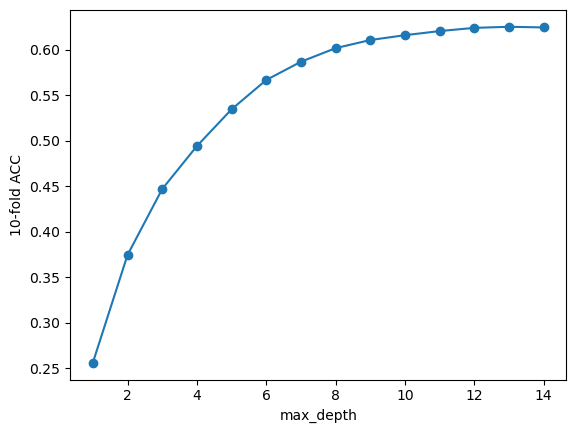

In [404]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [406]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train,y_train)

print("Train: ",randomForest.score(X_train,y_train))
print("Test: ",randomForest.score(X_test,y_test))

c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train:  0.8813930028323128
Test:  0.6550560212075112


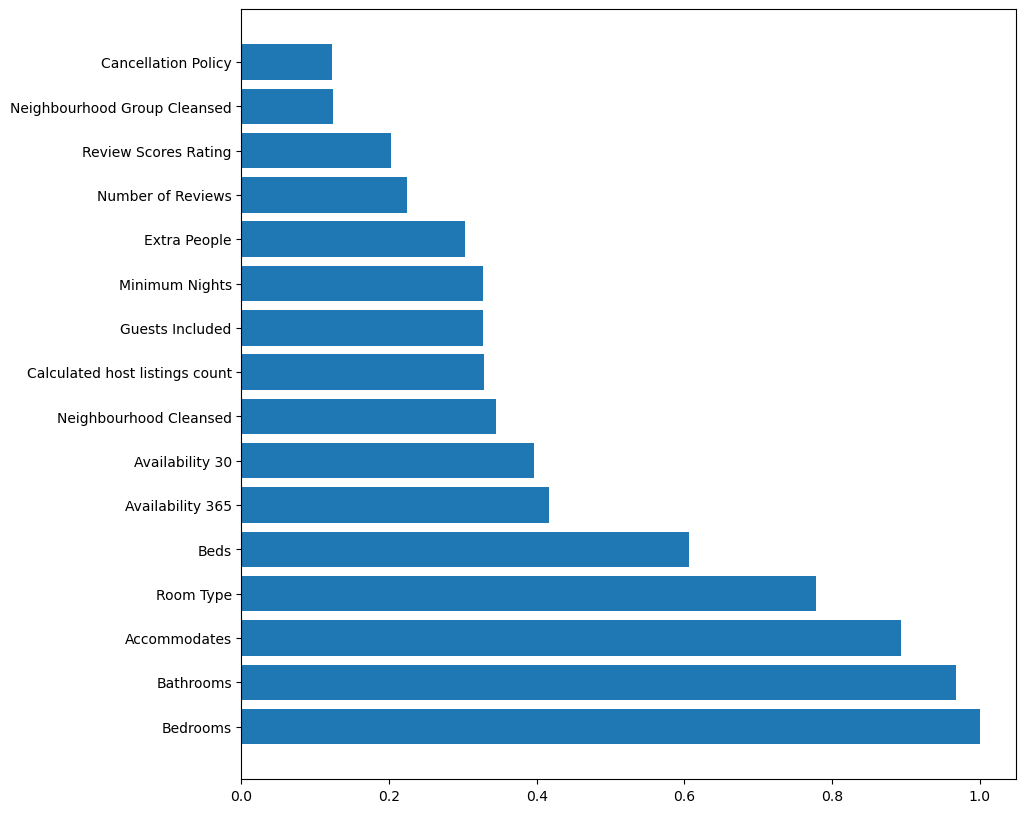

In [408]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

# Boosted

In [412]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=500; total time=   3.0s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   6.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   9.3s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   9.3s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=   9.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  12.6s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  12.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  12.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   3.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   3.0s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   3.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=   6.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=   6.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=   6.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=   9.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=   9.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=   9.3s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=  12.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=  12.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=  12.3s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


best mean cross-validation score: 0.630
best parameters: {'learning_rate': 0.05, 'n_estimators': 1000}


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


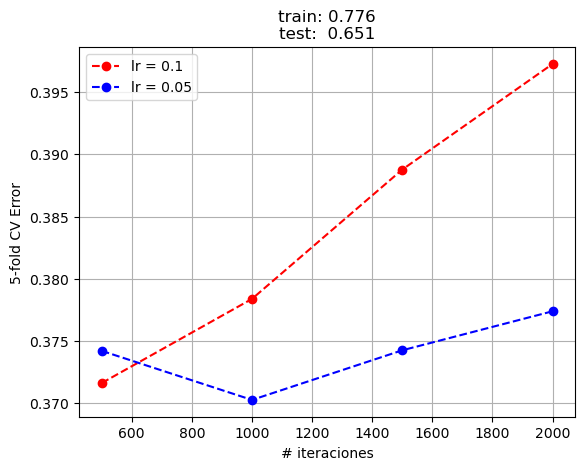

In [413]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train,y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train,y_train),bt.score(X_test,y_test)))
plt.grid()
plt.show()

In [414]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
baggingModel = GradientBoostingRegressor(max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo).fit(X_train,y_train)

print("Train: ",baggingModel.score(X_train,y_train))
print("Test: ",baggingModel.score(X_test,y_test))

c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Train:  0.7764384547774035
Test:  0.6518632136655276


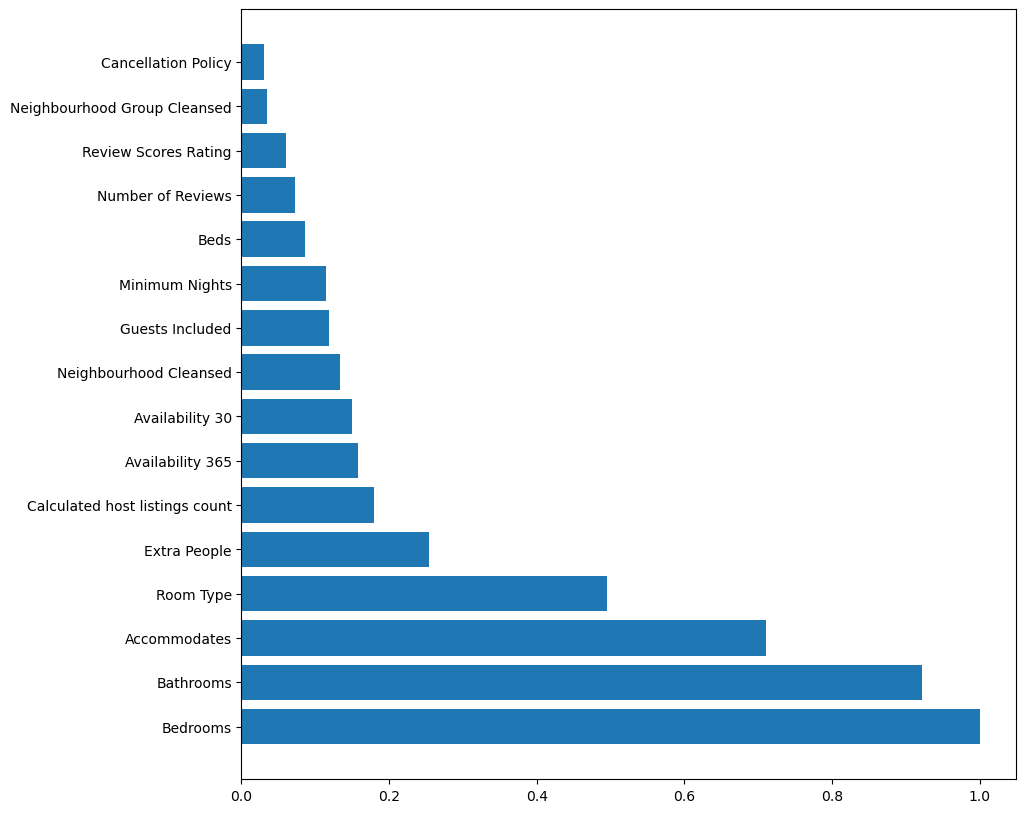

In [415]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),feature_names[indices])
plt.show()

# Aplicamos de nuevo los modelos tras hacer la Seleccion de caracteristicas

# Random Forest 
Despues de Seleccion de caracteristicas

In [17]:
from sklearn import preprocessing

# Dataset de train
var_selected = ['Price','Neighbourhood Cleansed', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds', 'Guests Included',
       'Extra People', 'Minimum Nights', 'Availability 30', 'Availability 365', 'Calculated host listings count']
data_train = airbnb_data[var_selected].values
y_train_sel = data_train[:,0:1]     # nos quedamos con la 1ª columna, price
X_train_sel = data_train[:,1:]      # nos quedamos con el resto

# Dataset de test
data_test = airbnb_data_test[var_selected].values
y_test_sel = data_test[:,0:1]     # nos quedamos con la 1ª columna, price
X_test_sel = data_test[:,1:]      # nos quedamos con el resto

# Nombre de las columnas sin la variable Precio
feature_names_sel = airbnb_data[var_selected].columns[1:]

In [18]:
feature_names_sel

Index(['Neighbourhood Cleansed', 'Room Type', 'Accommodates', 'Bathrooms',
       'Bedrooms', 'Beds', 'Guests Included', 'Extra People', 'Minimum Nights',
       'Availability 30', 'Availability 365',
       'Calculated host listings count'],
      dtype='object')

In [11]:
# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train_sel)
XtrainScaled = scaler.transform(X_train_sel)

# recordad que esta normalización/escalado la realizo con el scaler anterior, basado en los datos de training!
XtestScaled = scaler.transform(X_test_sel) 

Fitting 3 folds for each of 14 candidates, totalling 42 fits


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=1; total time=   0.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=2; total time=   0.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.6s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=3; total time=   0.6s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.6s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=4; total time=   0.6s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.8s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=5; total time=   0.8s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.8s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   1.0s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=6; total time=   0.9s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   1.0s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   1.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=7; total time=   1.0s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   1.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   1.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=8; total time=   1.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   1.3s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   1.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END ........................................max_depth=9; total time=   1.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   1.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   1.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=10; total time=   1.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   1.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   1.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=11; total time=   1.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=12; total time=   1.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.8s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.8s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=13; total time=   1.8s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.9s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.9s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


[CV] END .......................................max_depth=14; total time=   1.9s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


best mean cross-validation score: 0.610
best parameters: {'max_depth': 14}


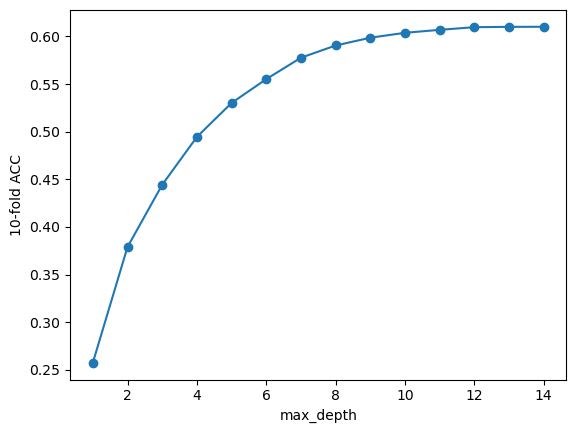

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=3, verbose=2) 
grid.fit(X_train_sel, y_train_sel)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [13]:
maxDepthOptimo = grid.best_params_['max_depth']
randomForest = RandomForestRegressor(max_depth=maxDepthOptimo,n_estimators=200,max_features='sqrt').fit(X_train_sel,y_train_sel)

print("Train: ",randomForest.score(X_train_sel,y_train_sel))
print("Test: ",randomForest.score(X_test_sel,y_test_sel))

c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Train:  0.8755546385104953
Test:  0.6378812060367197


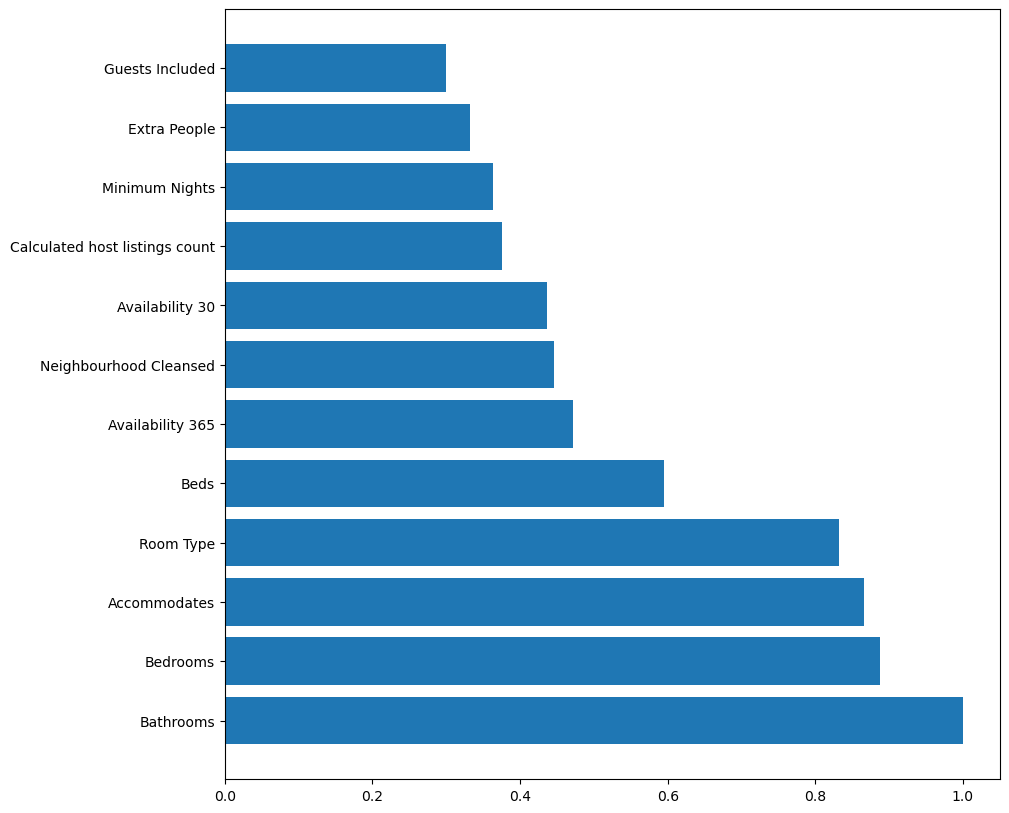

In [19]:
importances = randomForest.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train_sel.shape[1]),importances[indices])
plt.yticks(range(X_train_sel.shape[1]),feature_names_sel[indices])
plt.show()

# Boosted

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

Niterations = [500,1000,1500,2000]
learningRate = [0.1,0.05]
# mantenemos max_depth estático: max_depth=3

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingRegressor(random_state=0, max_depth=3), param_grid=param_grid, cv = 3, verbose=2)
grid.fit(X_train_sel, y_train_sel)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=500; total time=   4.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=500; total time=   4.3s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ................learning_rate=0.1, n_estimators=500; total time=   4.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   8.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   8.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1000; total time=   8.6s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  13.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  13.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=1500; total time=  13.6s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  18.1s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  18.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.1, n_estimators=2000; total time=  18.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   4.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   4.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ...............learning_rate=0.05, n_estimators=500; total time=   4.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=   8.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=   8.7s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1000; total time=   8.9s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=  12.9s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=  13.2s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=1500; total time=  13.0s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=  17.4s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=  17.5s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


[CV] END ..............learning_rate=0.05, n_estimators=2000; total time=  17.3s


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


best mean cross-validation score: 0.610
best parameters: {'learning_rate': 0.05, 'n_estimators': 1000}


c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


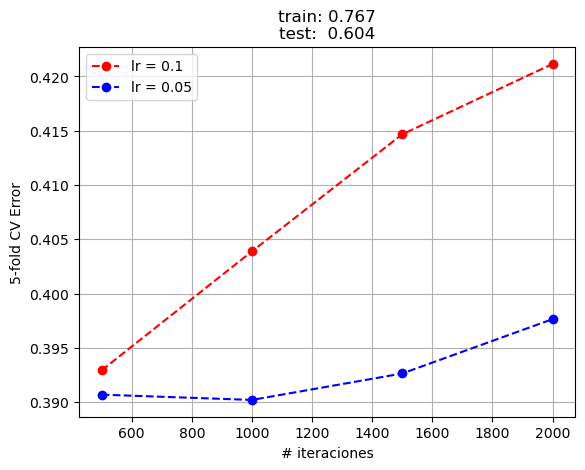

In [21]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
bt = GradientBoostingRegressor(random_state=0, max_depth=3,learning_rate=lrOptimo, n_estimators=neOptimo)
bt.fit(X_train_sel,y_train_sel)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(X_train_sel,y_train_sel),bt.score(X_test_sel,y_test_sel)))
plt.grid()
plt.show()

In [22]:
lrOptimo = grid.best_params_['learning_rate']
neOptimo = grid.best_params_['n_estimators']
baggingModel = GradientBoostingRegressor(max_depth=3, n_estimators=neOptimo, learning_rate=lrOptimo).fit(X_train_sel,y_train_sel)

print("Train: ",baggingModel.score(X_train_sel,y_train_sel))
print("Test: ",baggingModel.score(X_test_sel,y_test_sel))

c:\Users\CARLES\anaconda3\Lib\site-packages\sklearn\ensemble\_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


Train:  0.7670453839732655
Test:  0.6038262388748874


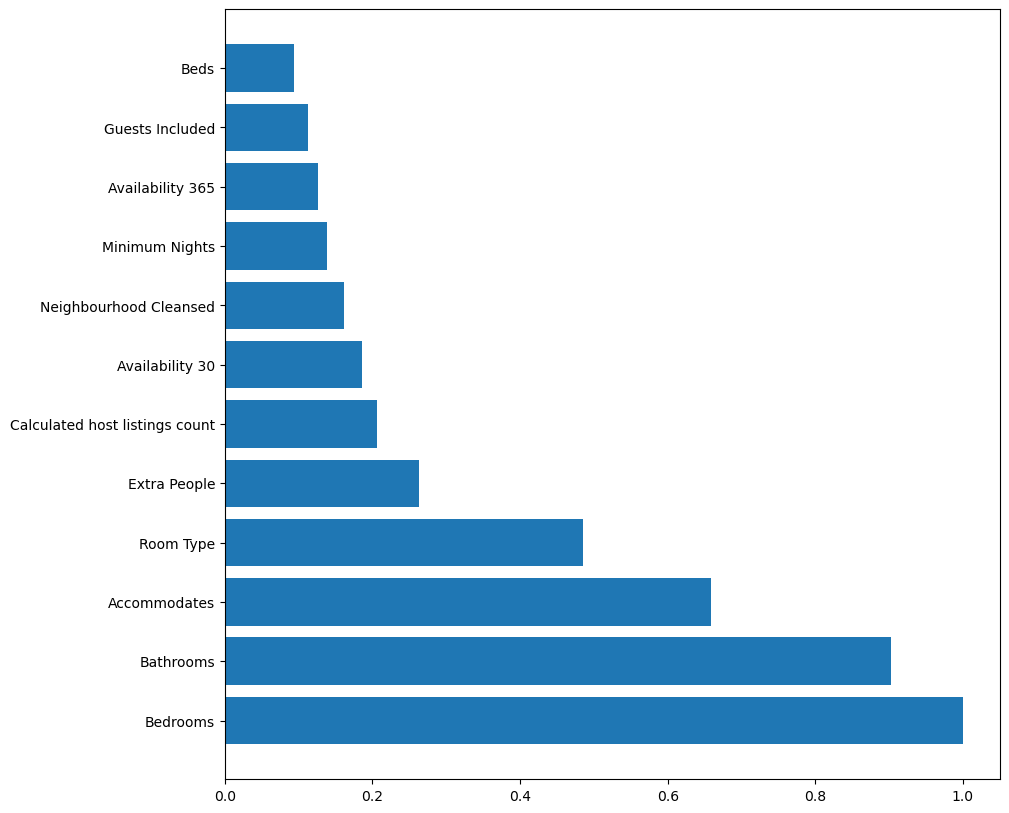

In [23]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(X_train_sel.shape[1]),importances[indices])
plt.yticks(range(X_train_sel.shape[1]),feature_names_sel[indices])
plt.show()

# CONCLUSIÓN

Hemos utilizado los modelos de regresión Random Forest y Gradient Boosting para hacer una predicción de los apartamentos airbnb en Madrid, obteniendo los siguientes resultados:

Random Forest:
Train:  0.8813930028323128
Test:  0.6550560212075112

Gradient Boosting:
Train:  0.7764384547774035
Test:  0.6518632136655276

Hemos retirado 4 variable con la selección de características, variando muy poco el resultado en ambos modelos.
Los resultados en el dataset de test deberían de ser mejores, por lo que nos haría falta conseguir más variables o un mayor número de muestras